# EDA Bank dataset

En este notebook se realiza un Análisis Exploratorio de los Datos (EDA) del dataset `bank-additional`, una vez finalizada la limpieza e imputación de valores nulos.

In [1]:
#Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#Exploracion de archivos
import sys
sys.path.append('../')

#Funciones personalizadas
from src import soporte_visualizacion as spv 

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.
We found no compiled module, did NumPy build successfully?

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python 3.13 from "/Users/krystian/Desktop/Data Analytics Materiales/Proyectos/Python for Data/bank_marketing/bank_marketing_environment/bin/python"
  * The NumPy version is: "2.4.1"

and make sure that they are the versions you expect.

Please carefully study the information and documentation linked above.
This is unlikely to be a NumPy issue but will be caused by a bad install
or environment on your machine.

Original error was: No module named 'numpy._core._multiarray_umath'


In [2]:
df_o = pd.read_csv('../data/processed/02.data_limpios_no_nulos_bank.csv', index_col=0, parse_dates=['date'])

In [3]:
df = df_o.copy()

## Análisis de la variable objetivo `y`

In [4]:
target_summary = pd.DataFrame({
    'count': df['y'].value_counts(),
    'percentage': df['y'].value_counts(normalize=True) * 100
}).round(2)

target_summary



,count,percentage
y,,
False,37941,88.75
True,4811,11.25


Lo vemos gráficamente mediante un countplot

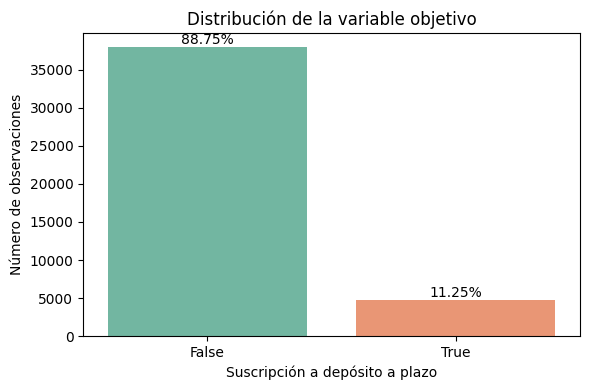

In [5]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(
    x='y',
    hue='y',
    data=df,
    palette='Set2',
    legend=False
)

total = len(df)

for p in ax.patches:
    porcentaje = 100 * p.get_height() / total
    ax.annotate(
        f'{porcentaje:.2f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title('Distribución de la variable objetivo')
plt.xlabel('Suscripción a depósito a plazo')
plt.ylabel('Número de observaciones')
plt.tight_layout()
plt.show()


Aquí vemos que que la mayoría de los clientes no contratan el producto, ya que el 88.75% de las observaciones pertenecen a la clase False, mientras que solo el 11.25% corresponden a la clase True.

In [6]:
# Variables numéricas y categóricas que queremos analizar
num_cols = ['age', 'duration', 'campaign']
cat_cols = ['job', 'education', 'marital', 'contact_month']

## Histograma de age
Analizamos como se distribuye la edad de los clientes contactados en la campaña

- Variable analizada: 
    - `age`-> edad del cliente



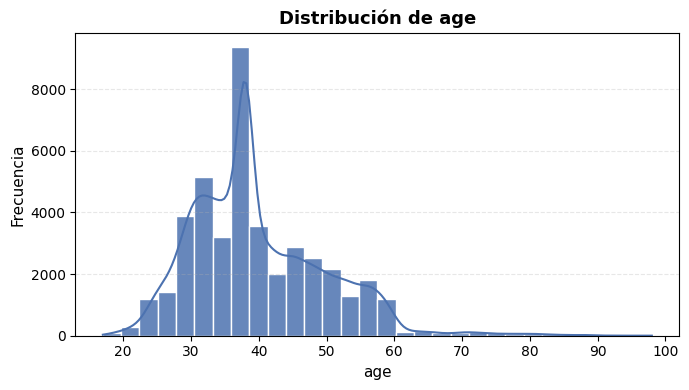

In [7]:
spv.plot_hist(df,['age'])

La distribución de la variable `age` muestra una mayor concentración de clientes en edades adultas, con un pico aproximado entre los 30 y 50 años.

## Boxplot de `duration`, `campaign` y `previous` vs `y`.

Vamos a analizar lo siguiente:

- La duración de las llamadas entre clientes que contratan y los que no.
- Si influye el número de contactos realizados en la probabilidad de suscripción.
- Si influye el historial de contactos previos en la probabilidad de suscripción.

- Variables analizadas:
    - duration -> duración de la llamada (en segundos)
    - campaign -> número de contactos realizados durante la campaña actual
    - previous -> número de veces que se ha contactado al cliente antes de esta campaña
    - y -> variable objetivo (suscripción)

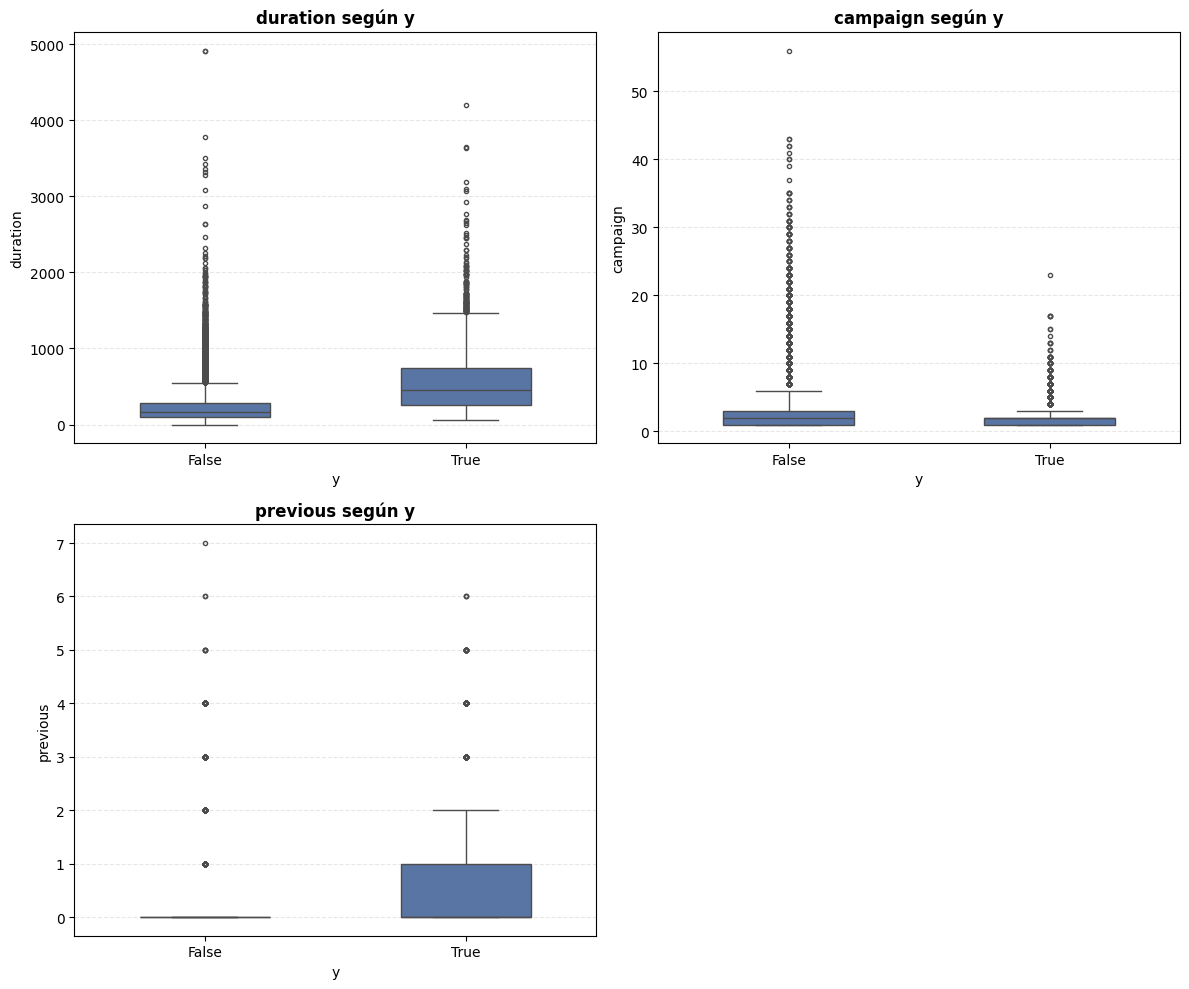

In [8]:
spv.plot_box_vs_target(df, ['duration', 'campaign', 'previous'])

Podemos observar las siguientes conclusiones:
- Clientes que finalmente contratan el depósito presentan llamadas más largas.
- Clientes que contrataron el producto suelen haber sido contactados un menor número de veces durante la campaña
- Clientes que no contrataron el producto no habían sido contactados previamente.

## Barplots de tasa de suscripción por variables categóricas.

Vamos a analizar lo siguiente:

- Qué categorías presentan una mayor tasa de suscripción al producto.
- Si el resultado de la campaña anterior influye en la probabilidad de suscripción actual.

- Variables analizadas:
    - job -> profesión del cliente
    - education -> nivel educativo
    - marital -> estado civil
    - contact_month -> mes cliente contactado
    - poutcome -> resultado de la campaña de marketing anterior
    - y -> variable objetivo

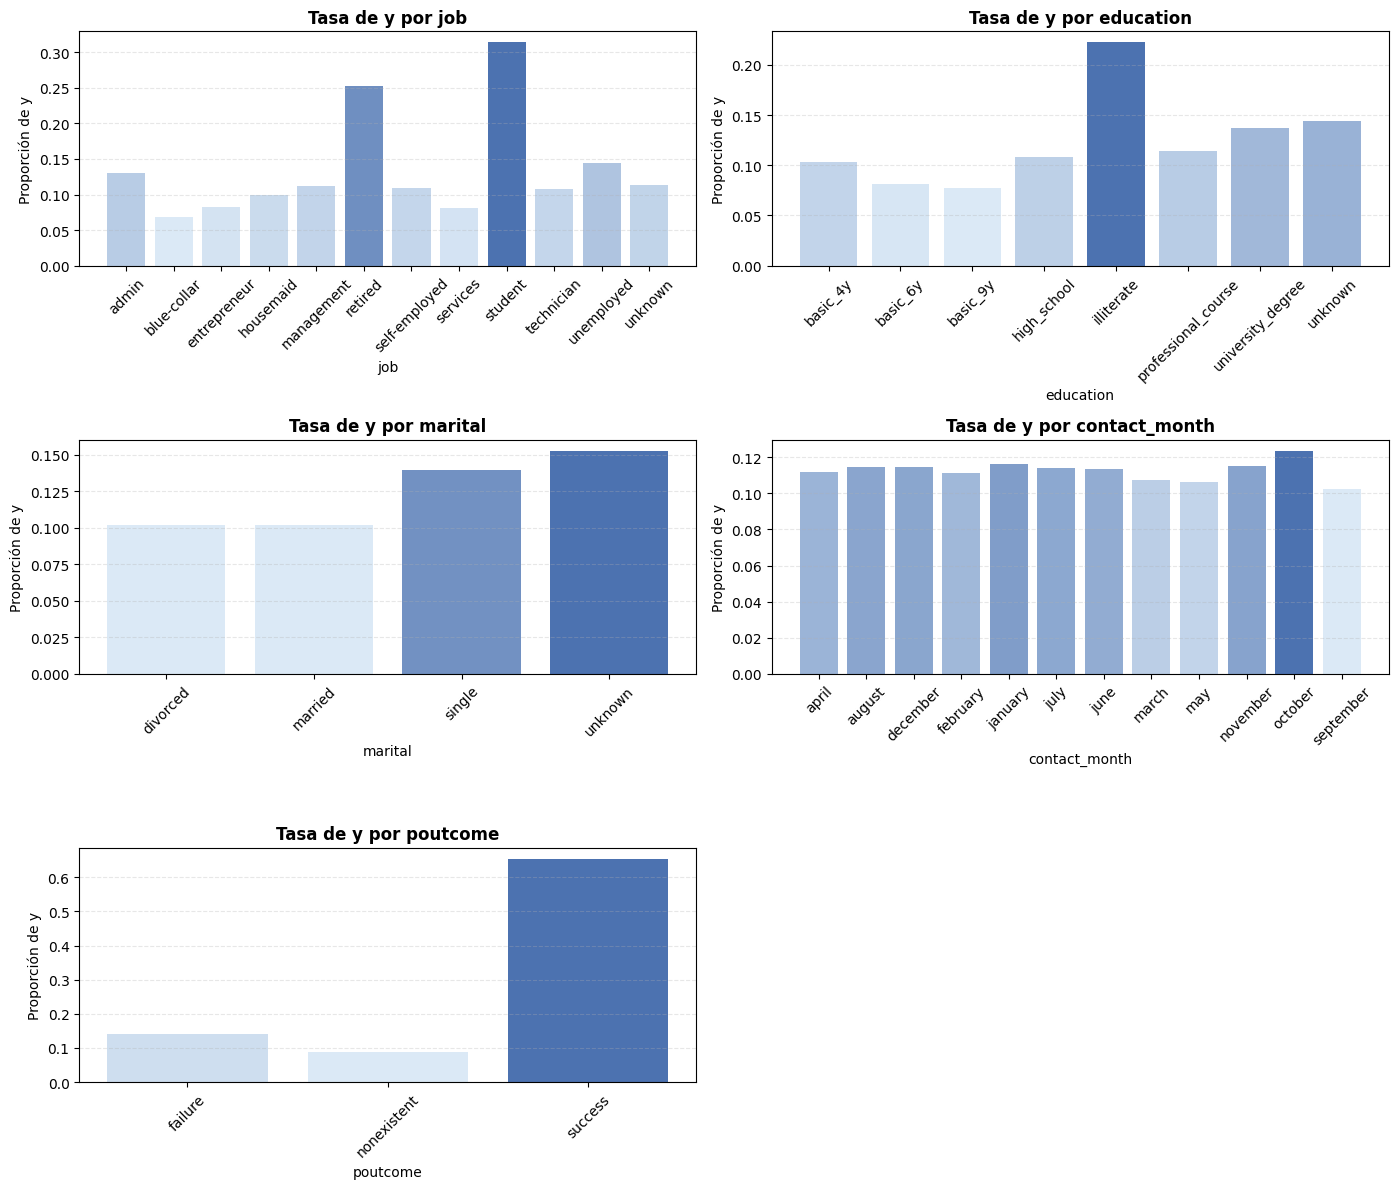

In [9]:
spv.plot_bar_rate(df, cat_cols + ['poutcome'])

Podemos observar las siguientes conclusiones:
- Algunas categorías de job, education y marital muestran tasas de suscripción más altas, destacando ciertos perfiles de clientes.
- Se observa un patrón estacional en contact_month, con algunos meses mostrando mayor tasa de respuesta.
- Los clientes que habían tenido éxito en campañas anteriores (success) presentan la mayor probabilidad de suscripción en la campaña actual.

## Evolución temporal por contact_year

Analizamos como evoluciona la tasa de suscripción a lo largo del tiempo

- Variables analizadas:
    - contact_year: año de contacto
    - y: variable objetivo



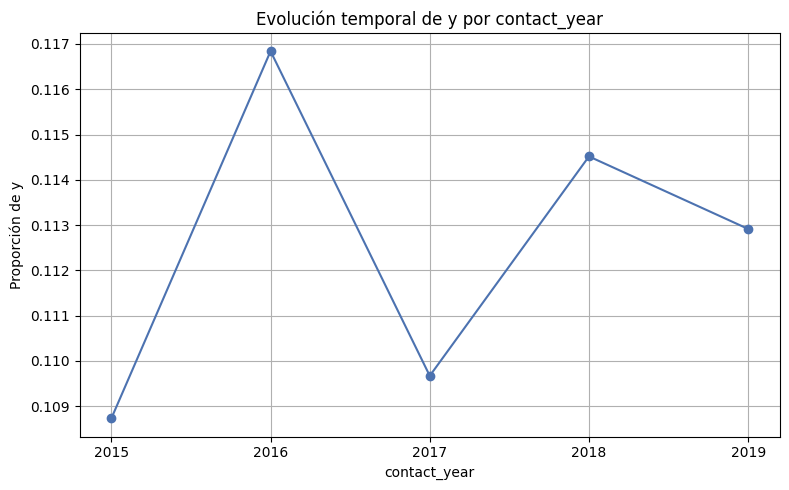

In [10]:
spv.plot_time_evolution(df, 'contact_year')

La tasa de suscripción varía entre distintos años, lo que permite analizar tendencias temporales y cambios en el comportamiento de los clientes.

## Análisis: Variables macroeconómicas vs y
Vamos a analizar lo siguiente:
- Si influye el contexto macroeconómico en la probabilidad de suscripción
- Si existen diferencias en las variables económicas entre clientes que suscriben y los que no.

- Variables analizadas: 
    - emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed
    - y → variable objetivo (suscripción al producto)

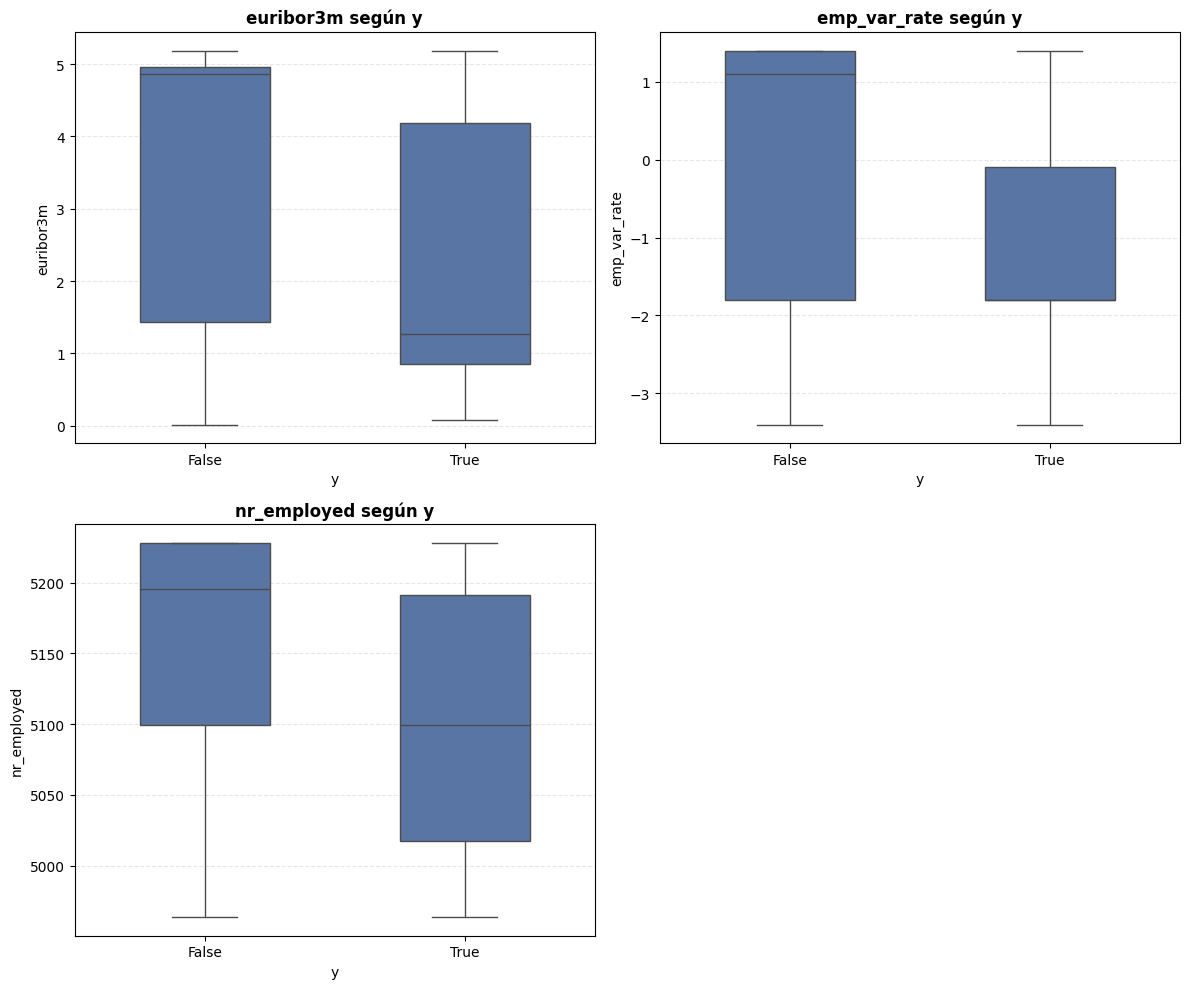

In [11]:
macro_cols = [ 'euribor3m', 'emp_var_rate', 'nr_employed']

spv.plot_box_vs_target(df, macro_cols, target='y')


Se aprecian diferencias en la distribución de algunas variables macroeconómicas entre clientes que suscriben y los que no, lo que indica que el contexto económico puede influir en la respuesta a la campaña.

## Heatmap de correlaciones (variables numéricas)

Analizaremos las relaciones entre variables numéricas.

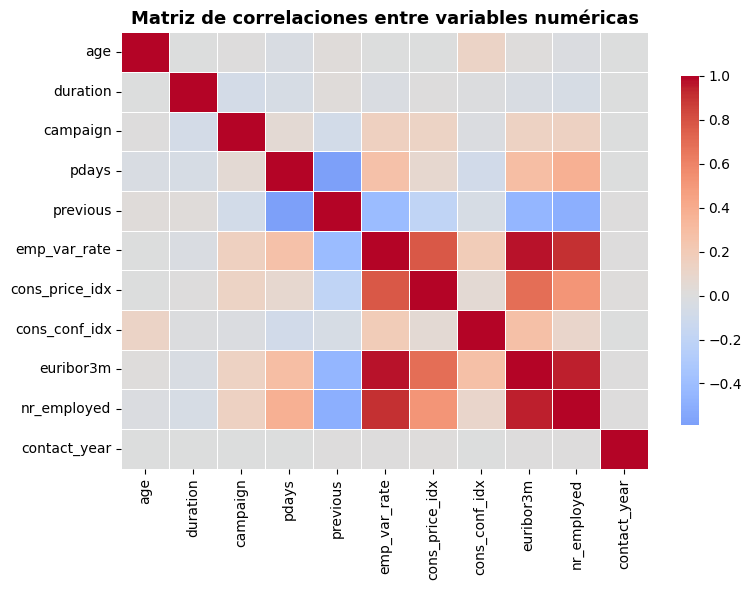

In [12]:
spv.plot_corr_heatmap(df)


Se observan correlaciones relevantes entre algunas variables macroeconómicas y de campaña,